In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:

# 2. LOAD DATASET

file_path = r"D:\p\college_python\Project\Salary Data.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = ["Age", "Gender", "Education", "JobTitle", "YearsExperience", "Salary"]

# Drop missing
df = df.dropna()

df.head()

,Age,Gender,Education,JobTitle,YearsExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:

# 3. CREATE SENIORITY FEATURE

def get_seniority(title):
    t = title.lower()
    if "intern" in t: return "Intern"
    if "junior" in t: return "Junior"
    if "senior" in t: return "Senior"
    if "lead" in t or "principal" in t: return "Lead"
    if "manager" in t: return "Manager"
    if "director" in t: return "Director"
    if "vp" in t: return "VP"
    if "chief" in t or "cfo" in t or "ceo" in t: return "CLevel"
    return "Mid"

df["Seniority"] = df["JobTitle"].apply(get_seniority)
df.drop("JobTitle", axis=1, inplace=True)

df.head()

,Age,Gender,Education,YearsExperience,Salary,Seniority
0,32.0,Male,Bachelor's,5.0,90000.0,Mid
1,28.0,Female,Master's,3.0,65000.0,Mid
2,45.0,Male,PhD,15.0,150000.0,Senior
3,36.0,Female,Bachelor's,7.0,60000.0,Mid
4,52.0,Male,Master's,20.0,200000.0,Director


In [7]:

# 4. FEATURES AND TARGET
X = df[["Age", "Gender", "Education", "YearsExperience", "Seniority"]]
y = df["Salary"]

# Categorical & numerical columns
categorical_cols = ["Gender", "Education", "Seniority"]
numeric_cols = ["Age", "YearsExperience"]

In [9]:

# 5. ENCODING PIPELINE

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


In [11]:

# 6. TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:

# 7. MODEL COMPARISON DICTIONARY

results = {}

In [15]:

# MODEL 1: RIDGE REGRESSION

ridge_model = Pipeline([
    ('pre', preprocessor),
    ('model', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

results["Ridge Regression"] = {
    "R2": r2_score(y_test, y_pred_ridge),
    "MSE": mean_squared_error(y_test, y_pred_ridge)
}

In [17]:

# MODEL 2: SIMPLE LINEAR REGRESSION

X_train_simple = X_train[["YearsExperience"]]
X_test_simple = X_test[["YearsExperience"]]

slr = LinearRegression()
slr.fit(X_train_simple, y_train)
y_pred_slr = slr.predict(X_test_simple)

results["Simple Linear Regression"] = {
    "R2": r2_score(y_test, y_pred_slr),
    "MSE": mean_squared_error(y_test, y_pred_slr)
}


In [19]:

# MODEL 3: POLYNOMIAL REGRESSION (Degree 2)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_simple)
X_poly_test = poly.transform(X_test_simple)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

results["Polynomial Regression"] = {
    "R2": r2_score(y_test, y_pred_poly),
    "MSE": mean_squared_error(y_test, y_pred_poly)
}


In [21]:

# MODEL 4: DECISION TREE REGRESSION

tree_model = Pipeline([
    ('pre', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

results["Decision Tree"] = {
    "R2": r2_score(y_test, y_pred_tree),
    "MSE": mean_squared_error(y_test, y_pred_tree)
}


In [23]:

# MODEL 5: RANDOM FOREST REGRESSION

rf_model = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

results["Random Forest"] = {
    "R2": r2_score(y_test, y_pred_rf),
    "MSE": mean_squared_error(y_test, y_pred_rf)
}


In [25]:

# MODEL 6: SUPPORT VECTOR REGRESSION

svr_pipeline = Pipeline([
    ('pre', preprocessor),
    ('scale', StandardScaler()),
    ('model', SVR(kernel='rbf'))
])

svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)

results["SVR"] = {
    "R2": r2_score(y_test, y_pred_svr),
    "MSE": mean_squared_error(y_test, y_pred_svr)
}


In [27]:

# 8. PRINT COMPARISON TABLE

print("\n\nMODEL PERFORMANCE COMPARISON:\n")
for model_name, scores in results.items():
    print(f"{model_name:25s}  R2 = {scores['R2']:.4f}   MSE = {scores['MSE']:.2f}")




MODEL PERFORMANCE COMPARISON:

Ridge Regression           R2 = 0.9112   MSE = 212871636.07
Simple Linear Regression   R2 = 0.8991   MSE = 241834883.90
Polynomial Regression      R2 = 0.8991   MSE = 241796446.14
Decision Tree              R2 = 0.8438   MSE = 374587962.96
Random Forest              R2 = 0.9141   MSE = 205860240.96
SVR                        R2 = -0.0222   MSE = 2450803928.95


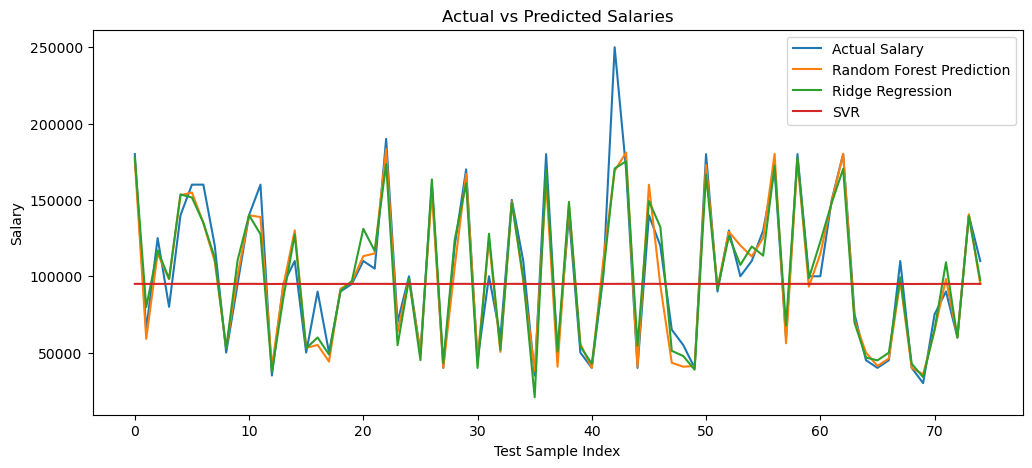

In [29]:

# 9. PLOTTING PREDICTIONS

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual Salary")
plt.plot(y_pred_rf, label="Random Forest Prediction")
plt.plot(y_pred_ridge, label="Ridge Regression")
plt.plot(y_pred_svr, label="SVR")
plt.legend()
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Test Sample Index")
plt.ylabel("Salary")
plt.show()
